In [1]:
#Import file
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

import os
for dirname, _, filenames in os.walk('/MedicalCostPersonal/Datasets'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/MedicalCostPersonal/Datasets\insurance.csv


In [2]:
#Load file
df = pd.read_csv("/MedicalCostPersonal/Datasets/insurance.csv")

In [3]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
#Check datasets shape (rows and columns)
df.shape

(1338, 7)

In [5]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# EDA and Visualizations

## Taking into account certain factors (sex, smoking, having children) let's see how it changes by region.

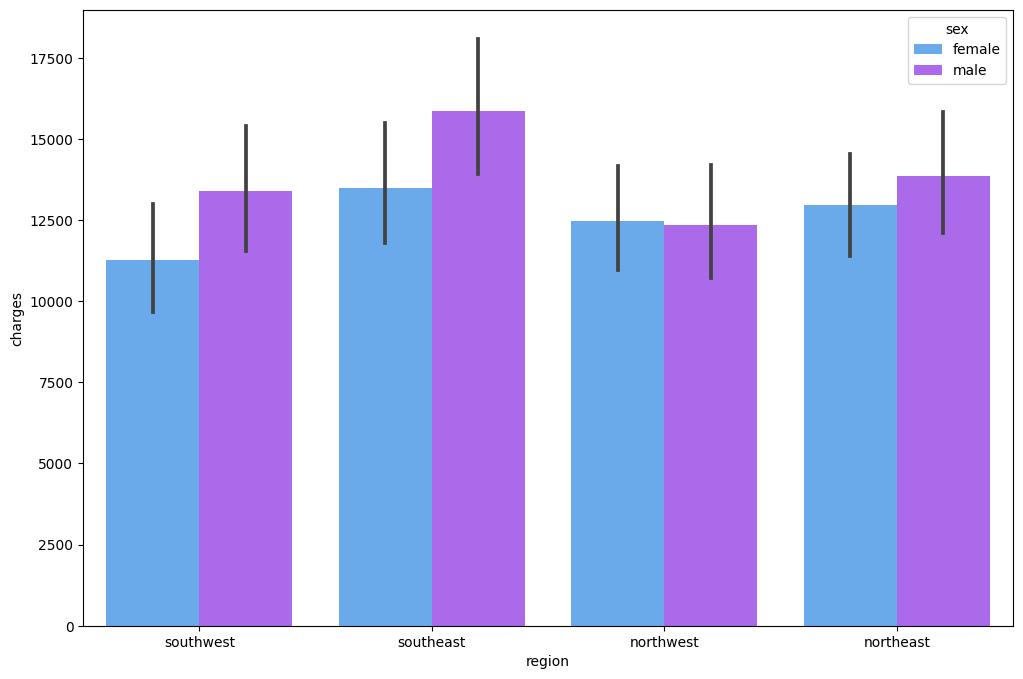

In [6]:
#Sex
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='sex', data=df, palette='cool')

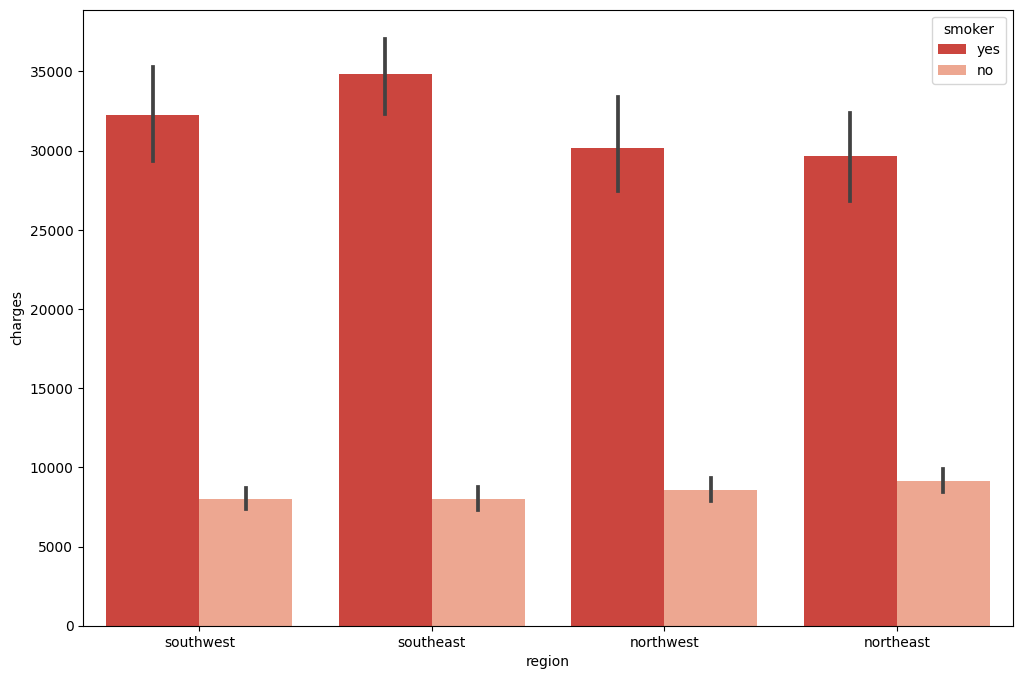

In [7]:
#Smoker
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='smoker', data=df, palette='Reds_r')

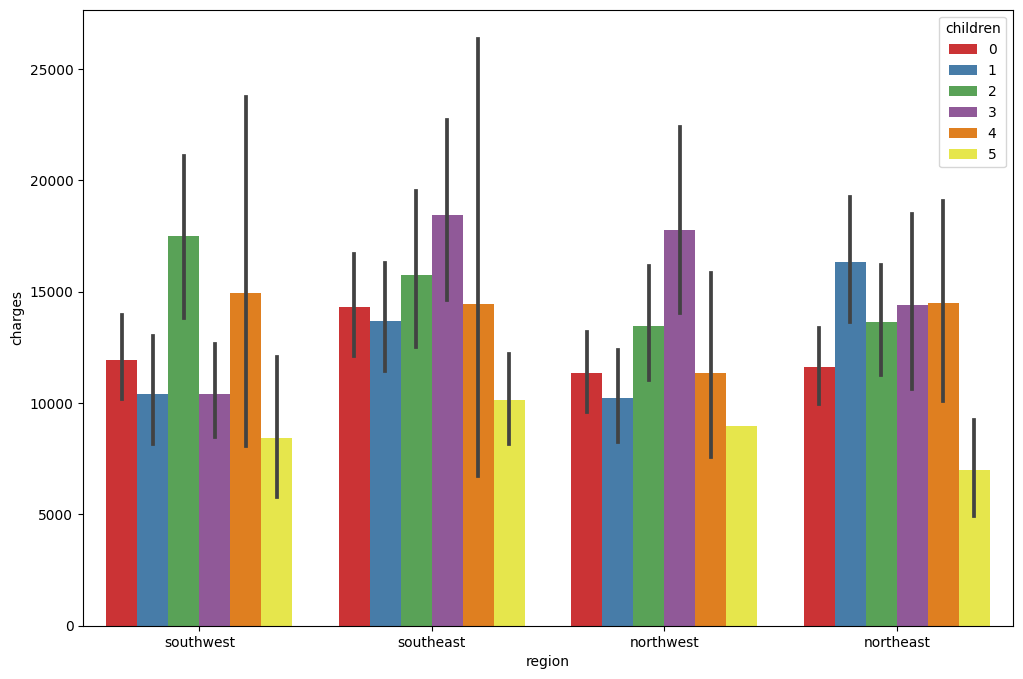

In [8]:
#Children
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='children', data=df, palette='Set1')

## The medical charges by age, bmi and children according to the smoking factor

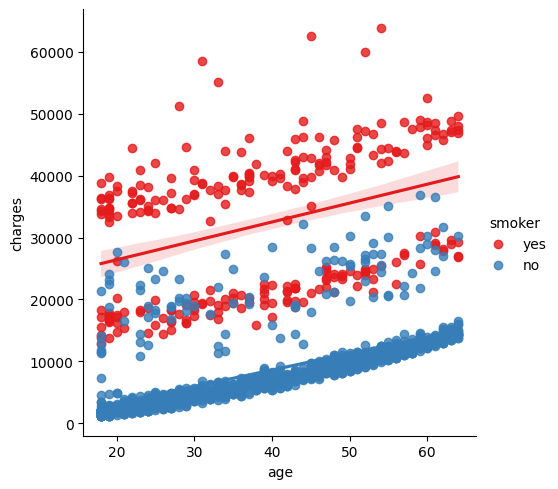

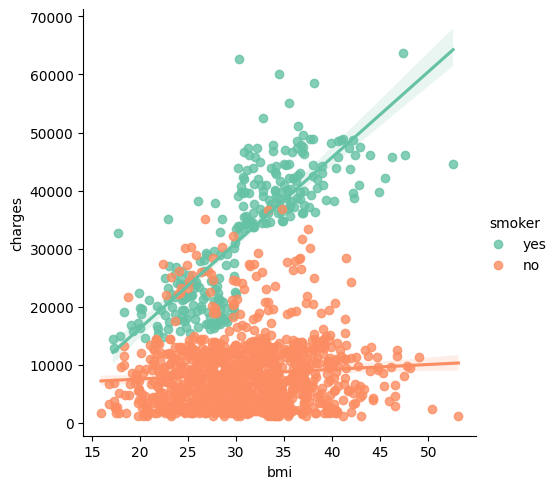

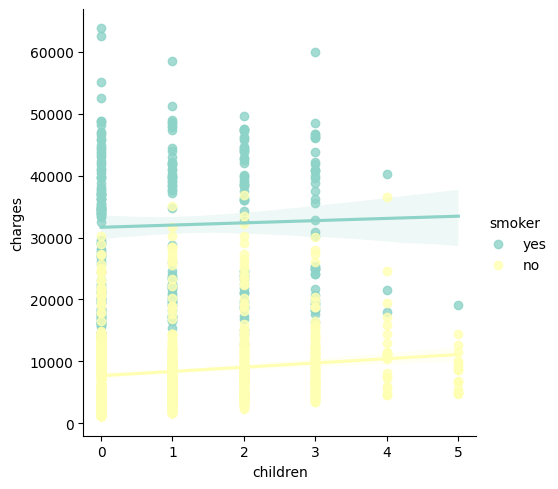

In [9]:
ax = sns.lmplot(x = 'age', y = 'charges', data=df, hue='smoker', palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker', palette='Set2')
ax = sns.lmplot(x = 'children', y = 'charges', data=df, hue='smoker', palette='Set3')


$\Rightarrow$ Smoking is the highest impact on medical costs.
$\Rightarrow$  The costs are growing with age, bmi, children.
$\Rightarrow$  People who have a children generally smoke less.


# Normalized data

In [10]:
#Converting objects labels into categorical
df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].astype('category')
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [11]:
##Converting category labels into numerical using LabelEncoder
label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)
label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)
df.dtypes

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

# Linear Regression

In [12]:
#Training and test
X = df.drop(['charges'], axis=1)
Y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(936, 6)
(402, 6)
(936,)
(402,)


In [13]:
#Prediction
regression = LinearRegression()
regression.fit(X_train, y_train)
y_prediction_lr = regression.predict(X_test)
y_prediction_lr = np.round(y_prediction_lr)

In [14]:
#RMSE
RMSE = sqrt(mean_squared_error(y_test, y_prediction_lr))
print(RMSE)

5814.244979373544


In [15]:
#Ordinary least squares Linear Regression
print(regression.score(X_train, y_train))

0.74225713201721
